In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import ray
from ray.rllib.agents import ppo, a3c, dqn, sac

from mdps.cattle import cMDPCattle
from utils.distributions import ConstantDistribution, ParticleDistribution, UniformDistribution

In [2]:
def get_rollouts(solver_, config):
    """Generate rollouts from a given solver and MDP(c)"""
    env_ = cMDPCattle(config=config)
    done_ = False
    obs_ = env_.reset()
    # run until episode ends
    gt_obs_arr_ = obs_
    gt_act_arr_ = None
    gt_rew_arr_ = None
    while not done_:
        action_ = solver_.compute_single_action(obs_)
        obs_, rewawrd_, done_, _ = env_.step(action_)
        gt_obs_arr_ = np.vstack((gt_obs_arr_, obs_))
        if gt_act_arr_ is None:
            gt_act_arr_ = [action_]
            gt_rew_arr_ = [rewawrd_]
        else:
            gt_act_arr_ += [action_]
            gt_rew_arr_ += [rewawrd_]

    gt_act_arr_ = np.array(gt_act_arr_)
    gt_rew_arr_ = np.array(gt_rew_arr_)
    return gt_obs_arr_[1:,:], gt_act_arr_, gt_rew_arr_

def plot_rollouts(gt_obs_arr_, gt_act_arr_):
    """Plot generated rollouts"""
    fig_, ax_1 = plt.subplots()
    fig_.set_size_inches(10, 6, forward=True)

    x = np.arange(start=0, stop=gt_obs_arr_.shape[0])
    ax_2 = ax_1.twinx()
    ax_1.plot(x, gt_obs_arr_[:,2], 'r-')
    ax_2.plot(x, gt_act_arr_, 'b-', alpha=0.3)

    ax_1.set_xlabel('time step')
    ax_1.set_ylabel('Breeding Stock(x)', color='r')
    ax_2.set_ylabel('Action', color='b')
    plt.title('sample observations and actions')
    plt.show()

In [3]:
c = {"context_distribution":
        ConstantDistribution(dim=10, constant_vector=np.array([1.0, 1.4, 0.95, 0.95, 0.7, 0.3, 0.5, 1E-8, 37, 63]))
    }

In [4]:
ray.shutdown()
ray.init()

expert = ppo.PPOTrainer(env=cMDPCattle, config={
    "env_config": c,
    "framework": "torch",  # config to pass to env class
})

rews = []
for eps in range(35):
    res = expert.train()
    if eps % 5 == 0:
        print(eps, res['episode_reward_mean'])
    rews += [res['episode_reward_mean']]

2022-04-02 12:58:19,686	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-04-02 12:58:19,687	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-02 12:58:21,854	WARNING util.py:57 -- Install gputil for GPU system monitoring.
2022-04-02 12:58:32,067	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 9502037754434.0x the scale of `vf_clip_param`. This means that it will take more than 9502037754434.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.


0 -95020377544336.1


2022-04-02 12:58:42,488	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 5821667730071.0x the scale of `vf_clip_param`. This means that it will take more than 5821667730071.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 12:58:53,981	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2872018604178.0x the scale of `vf_clip_param`. This means that it will take more than 2872018604178.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 12:59:04,446	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1409609917158.0x the scale of `vf_clip_param`. This means that it will take more than 1409609917158.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 12:59:15,502	WARNING ppo.py:245 -- The magnitud

5 -4340845261620.123


2022-04-02 12:59:38,206	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 222570418698.0x the scale of `vf_clip_param`. This means that it will take more than 222570418698.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 12:59:49,226	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 122748003958.0x the scale of `vf_clip_param`. This means that it will take more than 122748003958.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 12:59:59,864	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 87768198977.0x the scale of `vf_clip_param`. This means that it will take more than 87768198977.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:00:10,839	WARNING ppo.py:245 -- The magnitude of you

10 -431688410941.3934


2022-04-02 13:00:32,516	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 30920840836.0x the scale of `vf_clip_param`. This means that it will take more than 30920840836.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:00:43,057	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 25294325700.0x the scale of `vf_clip_param`. This means that it will take more than 25294325700.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:00:54,050	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 14742404685.0x the scale of `vf_clip_param`. This means that it will take more than 14742404685.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:01:05,215	WARNING ppo.py:245 -- The magnitude of your en

15 -86246640269.79114


2022-04-02 13:01:26,573	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 6540735184.0x the scale of `vf_clip_param`. This means that it will take more than 6540735184.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:01:39,212	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 4054651168.0x the scale of `vf_clip_param`. This means that it will take more than 4054651168.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:01:49,775	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 3201766575.0x the scale of `vf_clip_param`. This means that it will take more than 3201766575.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:02:00,624	WARNING ppo.py:245 -- The magnitude of your environm

20 -17507891707.662434


2022-04-02 13:02:21,284	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1136672801.0x the scale of `vf_clip_param`. This means that it will take more than 1136672801.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:02:31,670	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 921125671.0x the scale of `vf_clip_param`. This means that it will take more than 921125671.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:02:42,217	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 827786484.0x the scale of `vf_clip_param`. This means that it will take more than 827786484.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:02:52,502	WARNING ppo.py:245 -- The magnitude of your environment 

25 -5586168753.999734


2022-04-02 13:03:13,566	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 574175002.0x the scale of `vf_clip_param`. This means that it will take more than 574175002.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:03:24,840	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 570120480.0x the scale of `vf_clip_param`. This means that it will take more than 570120480.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:03:35,767	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 395437517.0x the scale of `vf_clip_param`. This means that it will take more than 395437517.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:03:46,627	WARNING ppo.py:245 -- The magnitude of your environment re

30 -3038060413.299934


2022-04-02 13:04:07,381	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 279942846.0x the scale of `vf_clip_param`. This means that it will take more than 279942846.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:04:17,764	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 287658763.0x the scale of `vf_clip_param`. This means that it will take more than 287658763.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:04:27,934	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 288038740.0x the scale of `vf_clip_param`. This means that it will take more than 288038740.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-02 13:04:38,109	WARNING ppo.py:245 -- The magnitude of your environment re

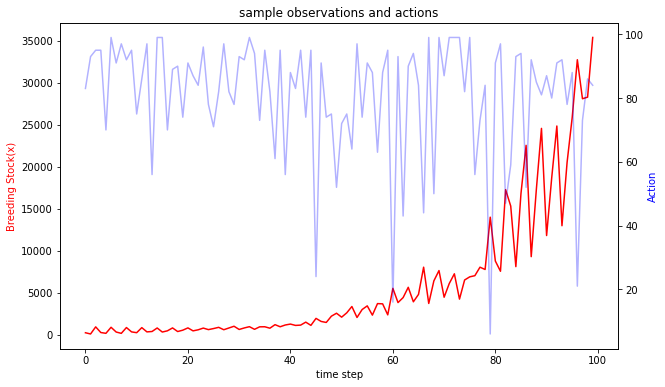

In [5]:
gt_obs_arr, gt_act_arr, gt_rew_arr = get_rollouts(expert, config=c)
plot_rollouts(gt_obs_arr, gt_act_arr)

In [ ]:
plt.pl